In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Quick Sort tiempos


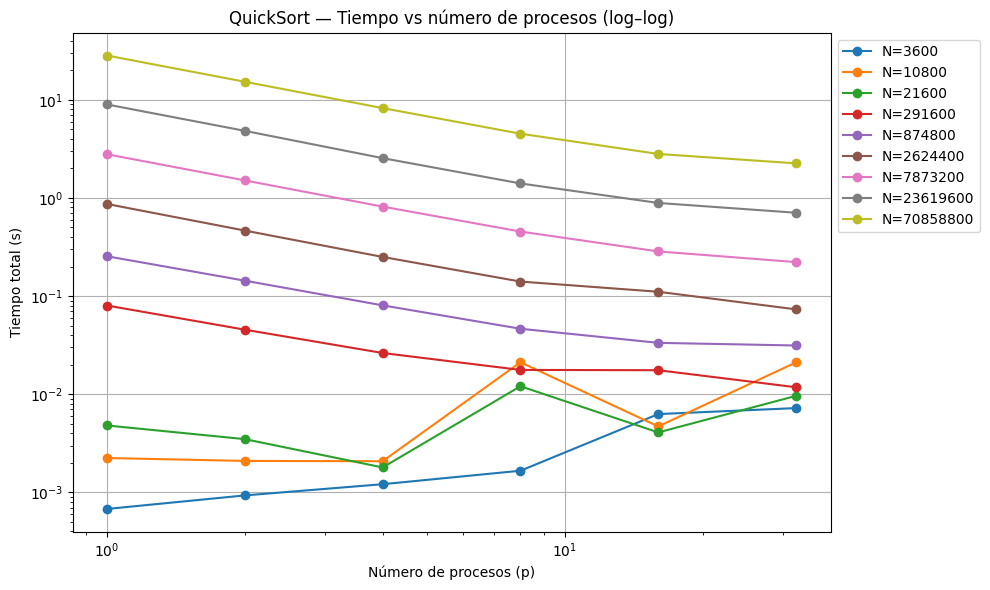

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TIEMPOS_DIR = "./tiempos/quickSort"
procesos = os.listdir(TIEMPOS_DIR)

all_data = []
for p in procesos:
    csv_path = os.path.join(TIEMPOS_DIR, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)

df_all_qs = pd.concat(all_data, ignore_index=True)

df_qs = df_all_qs.copy()
df_qs = df_qs[~df_qs['Step'].isin([1])]  

df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']

df_grouped_qs = (
    df_qs.groupby(['N', 'p'], as_index=False)[['Total']].sum()
)


unique_N = sorted(df_grouped_qs['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}


plt.figure(figsize=(10, 6))

for N, df_N in df_grouped_qs.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'],
             marker='o',
             label=f"N={N}",
             color=colors[N])

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo total (s)")
plt.title("QuickSort — Tiempo vs número de procesos (log-log)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


# Tiempos V1

,Step,Computo,Comunicacion,N,p
0,0,0.000011,1.151200e-04,10800,25
1,1,0.007427,1.314900e-04,10800,25
2,2,0.000188,2.958600e-04,10800,25
3,3,0.000680,0.000000e+00,10800,25
4,4,0.001120,0.000000e+00,10800,25
...,...,...,...,...,...
373,2,0.007433,4.200000e-07,874800,1
374,3,0.250282,0.000000e+00,874800,1
375,4,0.397813,0.000000e+00,874800,1
376,5,0.000000,6.651500e-04,874800,1


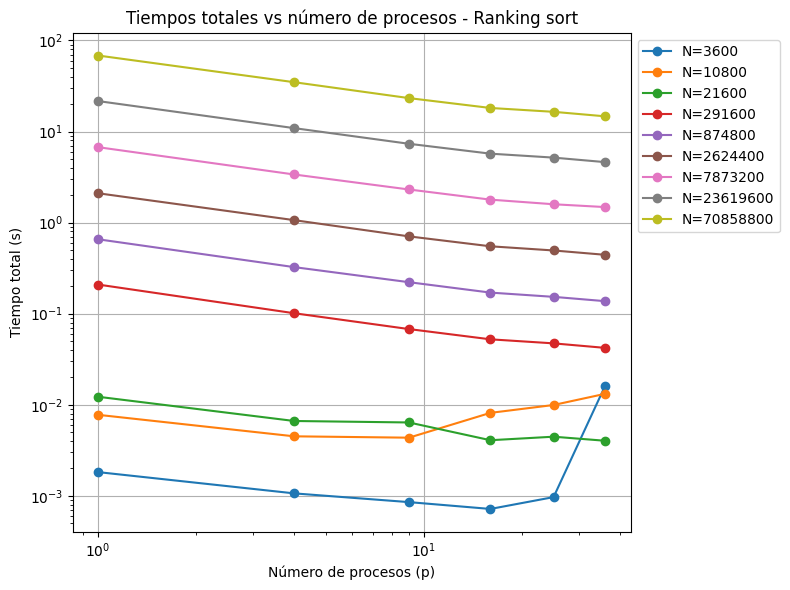

In [12]:
TIEMPOS_DIR = "./tiempos/v1"

procesos = os.listdir(TIEMPOS_DIR)

DATA_DIR = "./data"

N_s = os.listdir(DATA_DIR)

# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
display(df_all)

df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = (
    df_filtered
    .groupby(['N', 'p'], as_index=False)[['Total']].sum()
)

unique_N = sorted(df_grouped['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'],
             marker='o',
             label=f'N={N}',
             color=colors[N])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Tiempo total (s)')
plt.title('Tiempos totales vs número de procesos - Ranking sort')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()


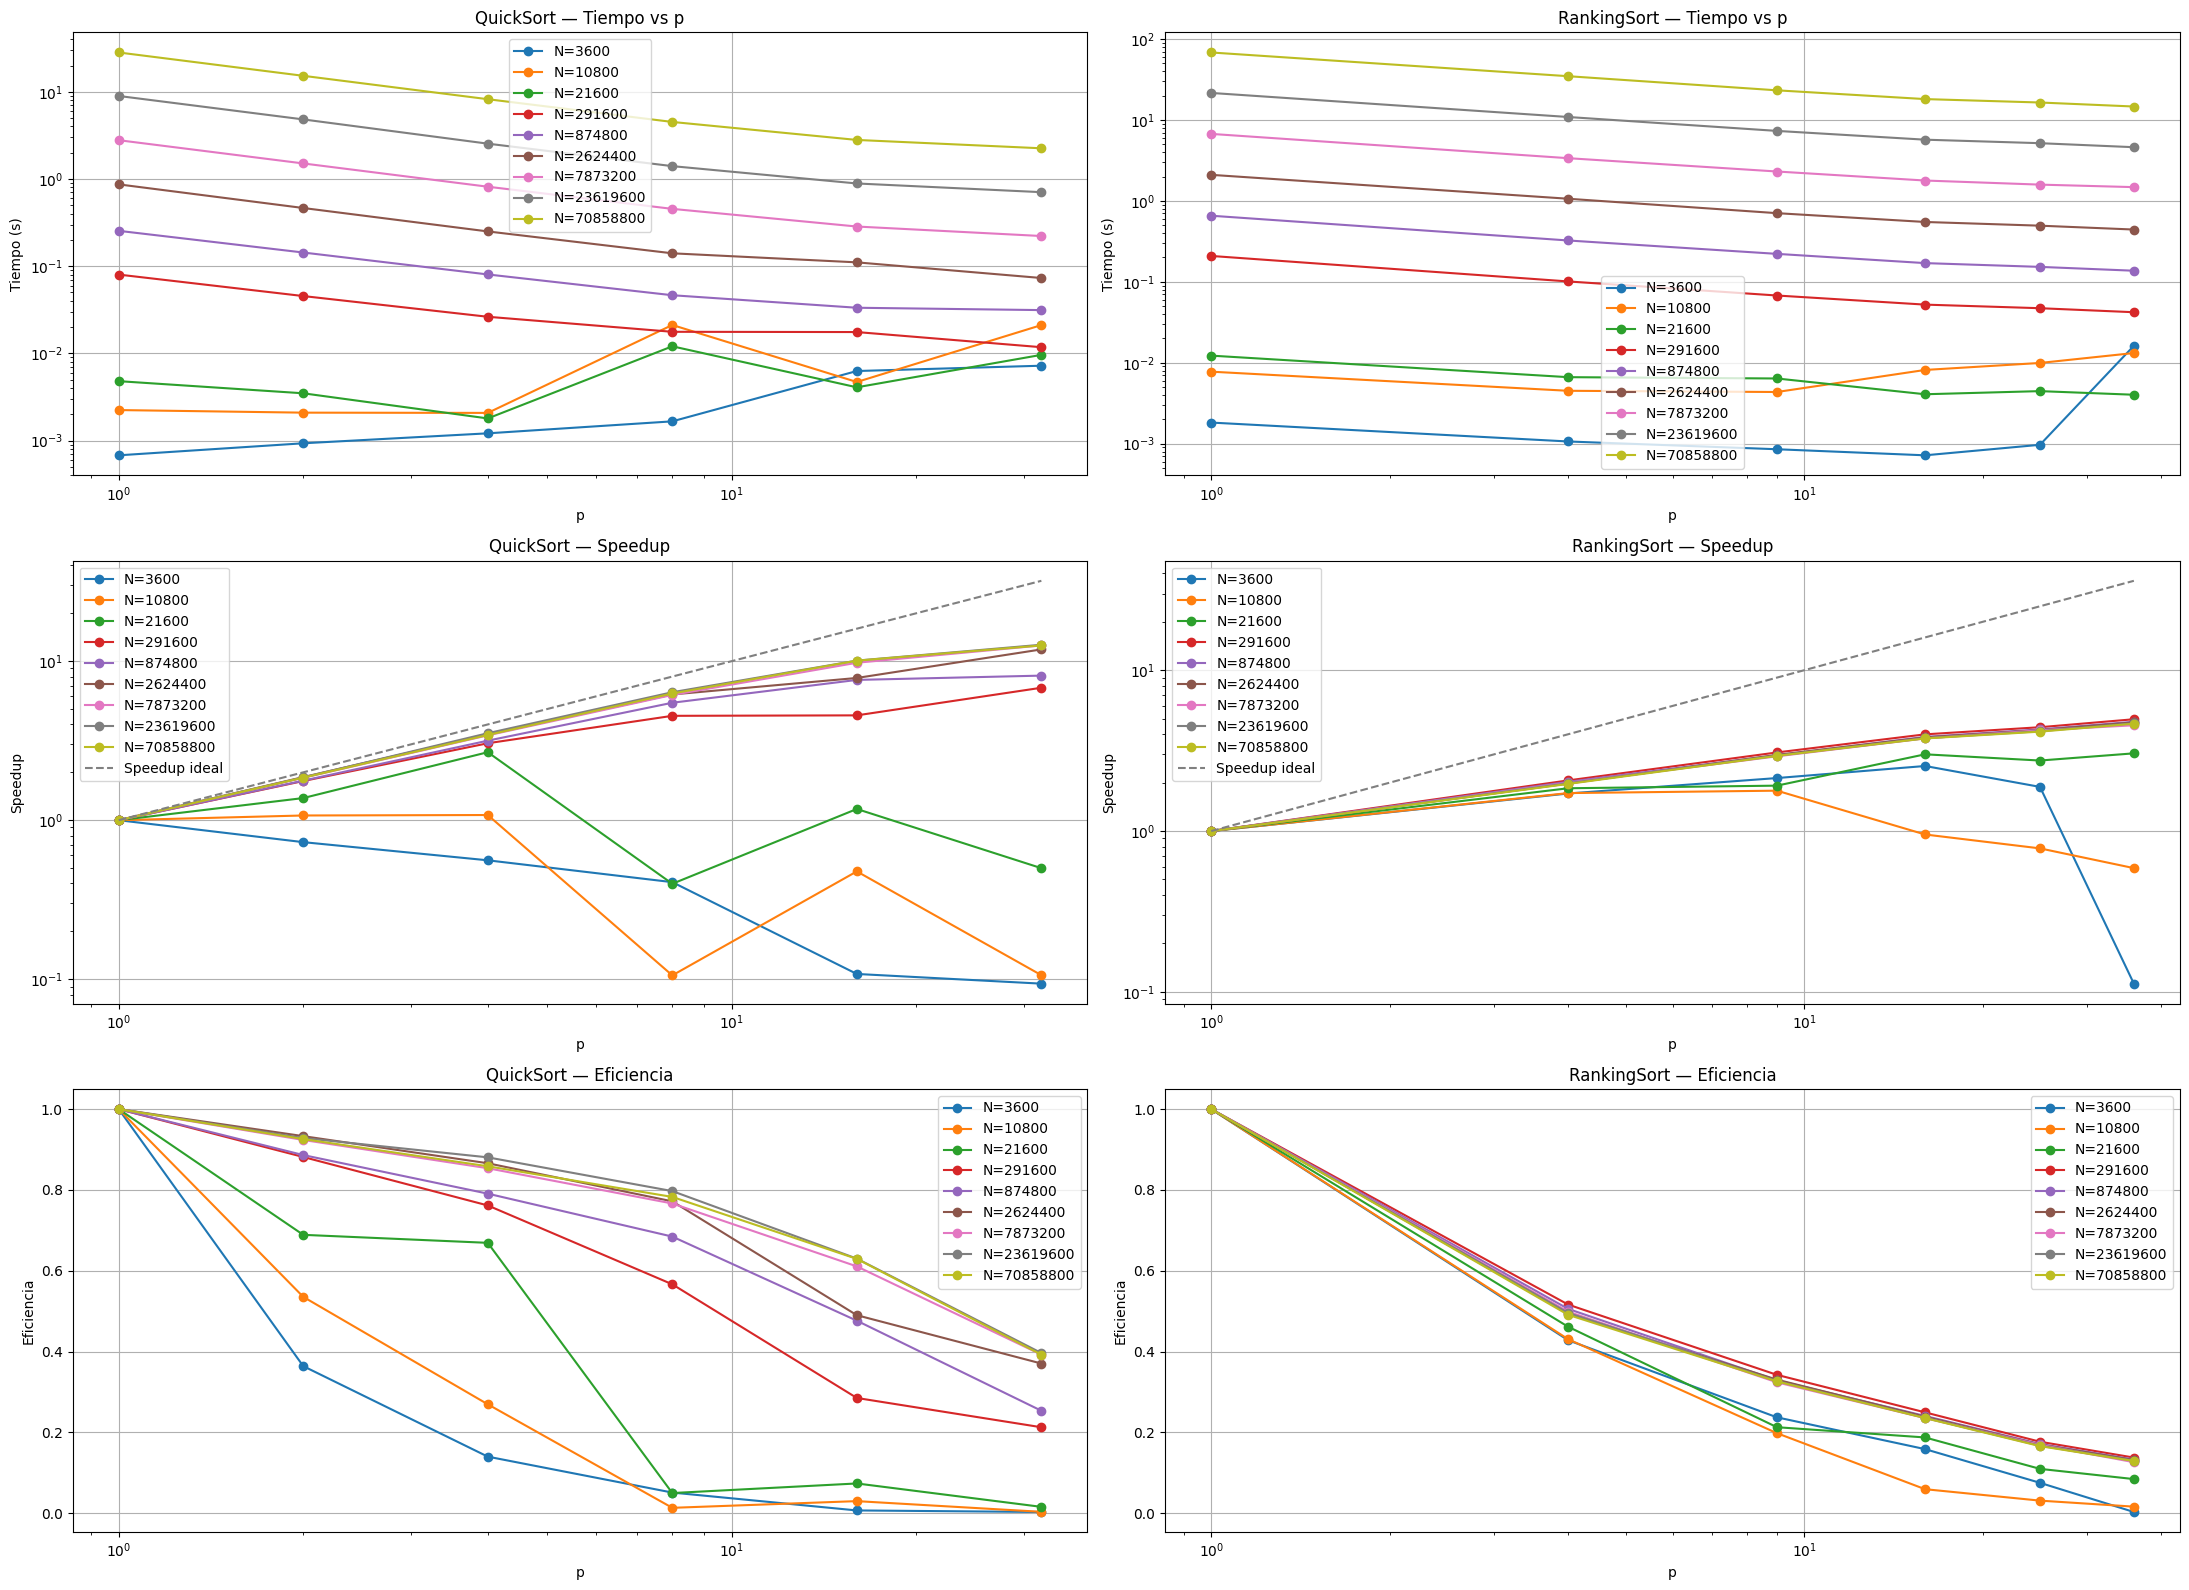

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------
#   QUICK SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']
df_grouped_qs = df_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   RANKING SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_RS = "./tiempos/v1"
procesos_rs = os.listdir(TIEMPOS_DIR_RS)

all_data_rs = []
for p in procesos_rs:
    csv_path = os.path.join(TIEMPOS_DIR_RS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_rs.append(df)

df_all_rs = pd.concat(all_data_rs, ignore_index=True)
df_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_rs['Total'] = df_rs['Computo'] + df_rs['Comunicacion']
df_grouped_rs = df_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   SPEEDUP DATA (QS y RS)
# ---------------------------------------------------

# QuickSort speedup
df_speed_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_speed_qs['Total'] = df_speed_qs['Computo'] + df_speed_qs['Comunicacion']
df_speed_qs = df_speed_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# RankingSort speedup
df_speed_rs = df_all_rs[df_all_rs['Step'].isin([1,2,3,4,5])].copy()
df_speed_rs['Total'] = df_speed_rs['Computo'] + df_speed_rs['Comunicacion']
df_speed_rs = df_speed_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   COLORS
# ---------------------------------------------------

unique_N = sorted(set(df_grouped_qs['N']) | set(df_grouped_rs['N']))
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

# ---------------------------------------------------
#   FIGURA 3×2 (6 gráficas)
# ---------------------------------------------------

fig, axes = plt.subplots(3, 2, figsize=(22, 16))

# ========================================
#   (1,1) — QuickSort TIME
# ========================================
ax = axes[0, 0]

for N, df_N in df_grouped_qs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (1,2) — RankingSort TIME
# ========================================
ax = axes[0, 1]

for N, df_N in df_grouped_rs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (2,1) — QuickSort SPEEDUP
# ========================================
ax = axes[1, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_qs["p"].min()),
    np.log10(df_speed_qs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (2,2) — RankingSort SPEEDUP
# ========================================
ax = axes[1, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_rs["p"].min()),
    np.log10(df_speed_rs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (3,1) — QuickSort EFICIENCIA
# ========================================
ax = axes[2, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("QuickSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

# ========================================
#   (3,2) — RankingSort EFICIENCIA
# ========================================
ax = axes[2, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("RankingSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


# v1 vs v2

/tmp/ipykernel_1893/2191638417.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


./graficos/comparacion_versiones_tiempo.png


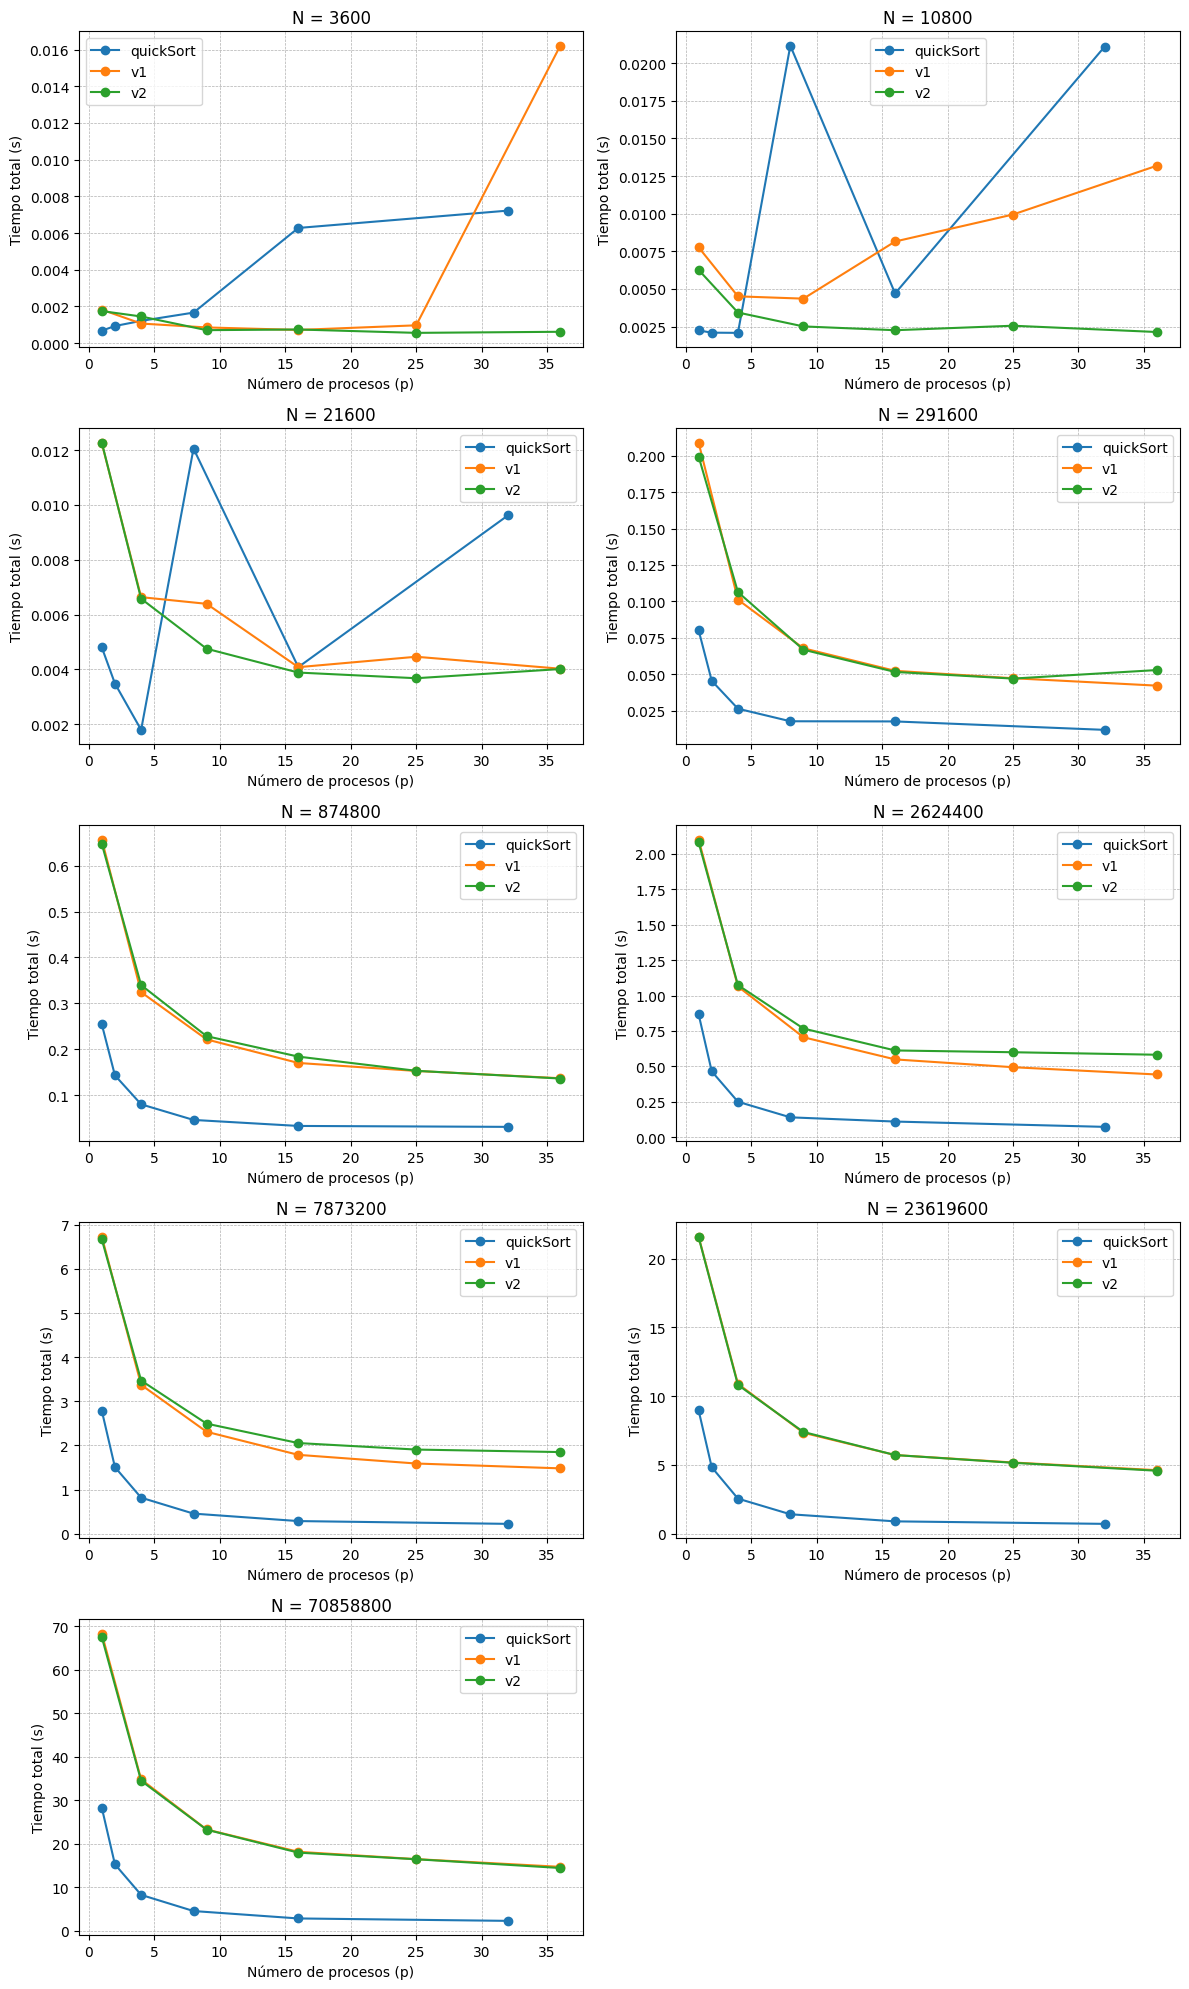

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TIEMPOS_DIR = "./tiempos"
OUT_DIR = "./graficos"

rows = []

for version in sorted(os.listdir(TIEMPOS_DIR)):
    vpath = os.path.join(TIEMPOS_DIR, version)

    for p in sorted(os.listdir(vpath), key=int):
        csv_path = os.path.join(vpath, p, 'tiempos.csv')
        df = pd.read_csv(csv_path)

        df['p'] = int(p)
        df['version'] = version
        rows.append(df)

df_all = pd.concat(rows, ignore_index=True)

df_filtered = df_all[(df_all['Step'] != 6) & (df_all['Step'] != 0)]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']

df_grouped = df_filtered.groupby(['version', 'N', 'p'], as_index=False)[['Total']].sum()

Ns = sorted(df_grouped['N'].unique())
versions = sorted(df_grouped['version'].unique())

cmap = plt.get_cmap('tab10')
colors = {v: cmap(i % 10) for i, v in enumerate(versions)}

ncols = 2
nrows = (len(Ns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()

for i, N in enumerate(Ns):
    ax = axes[i]

    for v in versions:
        df_v = df_grouped[(df_grouped['version'] == v) & (df_grouped['N'] == N)].copy()
        df_v = df_v.sort_values('p')

        ax.plot(df_v['p'], df_v['Total'],
                marker='o',
                label=v,
                color=colors[v])

    ax.set_title(f"N = {N}")
    ax.set_xlabel("Número de procesos (p)")
    ax.set_ylabel("Tiempo total (s)")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.legend()

for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()

os.makedirs(OUT_DIR, exist_ok=True)
out_path = f"{OUT_DIR}/comparacion_versiones_tiempo.png"
fig.savefig(out_path, dpi=200)
print(out_path)


# Comparación con Quicksort

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TIEMPOS_MPI = "./tiempos/quicksort_mpi"
procesos_mpi = os.listdir(TIEMPOS_MPI)
data_mpi = []

for p in procesos_mpi:
    path_csv = os.path.join(TIEMPOS_MPI, p, "tiempos.csv")
    df = pd.read_csv(path_csv)

    row = df.iloc[0].copy()
    row['p'] = int(p)      # proceso = nombre de carpeta
    row['Total'] = row['Computo'] + row['Comunicacion']

    data_mpi.append(row)

df_mpi = pd.DataFrame(data_mpi)
display(df_mpi)

,Step,Computo,Comunicacion,N,p,Total
0,0.0,0.000197,0.0,18.0,4.0,0.000197
